## Main template analysis


This notebook will generate model-independent MiniBooNE templates.

We then unfold them using our unfolder and plot a few examples against MicroBooNE (inclusive) data. 

Finally, we select templates with a given $p_{\rm val}^{\rm MB} > (80, 10, 1)\%$, and plot them according to their MicroBooNE chi2 and the total number of MiniBooNE events.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy 

from MicroTools import unfolder
from MicroTools.TemplateTools import mcmc_signal
from MicroTools.TemplateTools import miniboone_fit as mbfit

from MicroTools.InclusiveTools import inclusive


from MicroTools.TemplateTools import template_analysis as templ

from MicroTools.plot_tools import *

PATH_MCMC_CHAINS = 'MicroTools/mcmc_results'
PATH_PLOTS = 'plots/'

### generate model-independent templates

In [2]:
example = templ.Templates()

example.load_templates()

#### Get microBooNE templates through unfolding

In [3]:
example.unfold(analysis='1eX', remove_high_energy=False, unfold=True)

#### Calculate chi2s

In [4]:
example.compute_chi2s()

KeyboardInterrupt: 

#### MiniBooNE p-value

In [ ]:
example.compute_MB_pval(ndf=4.7)

#### Null hypothesis

In [106]:
mub_chi2_null_hypothesis = cern.Chi2_Inclusive(np.zeros(25))

In [107]:
# np.save("PyModules/HarvardPerimeter/data/mubMCMC_chi2s.dat", np.array([mub_x, mub_chi2s, mb_x, mb_chi2s]))
# np.save("PyModules/HarvardPerimeter/data/mubMCMC_miniboone_templates.dat", mb_templates)
# np.save("PyModules/HarvardPerimeter/data/mubMCMC_microboone_templates.dat", mub_templates)

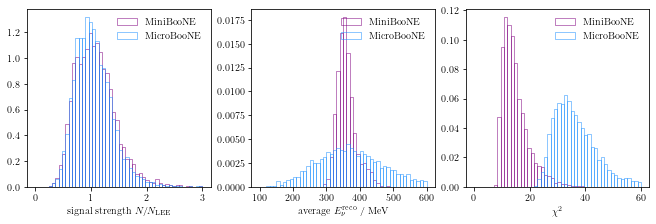

In [123]:
axs = (plt.figure(constrained_layout=True, figsize=(9,3)).subplots(1, 3))
args = {'bins':50, 'density': True, 'facecolor': 'None', 'lw': 0.5}
_ = axs[0].hist(example.signal_strength, edgecolor='purple', range=(0,3), label=f'MiniBooNE', **args)
_ = axs[0].hist(example.mub_signal_strength, edgecolor='dodgerblue', range=(0,3), label=f'MicroBooNE', **args)
axs[0].set_xlabel(r"signal strength $N / N_{\rm LEE}$")
axs[0].legend()

_ = axs[1].hist(example.avg_energy, edgecolor='purple', range=(100,600), label=f'MiniBooNE', **args)
_ = axs[1].hist(example.mub_avg_energy, edgecolor='dodgerblue', range=(100,600), label=f'MicroBooNE', **args)
axs[1].set_xlabel(r"average $E_{\nu}^{\rm reco}$ / MeV")
axs[1].legend()

_ = axs[2].hist(example.mb_chi2s, edgecolor='purple', range=(0,60), label=f'MiniBooNE',**args)
_ = axs[2].hist(example.mub_chi2s, edgecolor='dodgerblue', range=(0,60), label=f'MicroBooNE',**args)
axs[2].set_xlabel(r"$\chi^2$")
axs[2].legend()

In [13]:

# mb_template_worst=mb_templates[pval_1 & (mb_x>0.6)][np.argmin(mub_chi2s[pval_1 & (mb_x>0.6)])]
mb_template_worst = [94.40563491,41.31592711,44.36387293,29.99242961, -6.79081795,19.26734292,-8.77917357, -6.88138706, 7.63200631, -9.47116872, -22.11263405]
mub_template_worst=np.append(0.0, example.converter.miniToMicro(mb_template_worst))

# mb_template_best=mb_templates[pval_1 & (mb_x<1.3)][np.argmax(mub_chi2s[pval_1 & (mb_x<1.3)])]
mb_template_best=[170.56228436, 84.38734816, 91.74304699, 49.08114012, 19.81931372, 41.51597723, 14.62351973, 12.99344466, 24.8044534, 9.92501774, 7.46580514]
mub_template_best=np.append(0.0, example.converter.miniToMicro(mb_template_best))


In [14]:
print(f"x = {np.sum(mb_template_worst)/360}")
print(f"x = {np.sum(mb_template_best)/360}")

x = 0.5081723123333333
x = 1.463670420138889


In [70]:
from MicroTools.plot_tools import *

In [16]:
# # Our chi2
# micro_nominal_template = get_micro_templates(np.array([mbfit.mb_nominal_excess]))
# x_nominal, chi2_nominal = get_microboone_chi2s_in_x(micro_nominal_template, Npoints_for_x=100)
# ax.plot(x_nominal, chi2_nominal[0] - mub_chi2_null_hypothesis, color='black', lw=1.5, label=r'Our $\Delta \chi^2_{\rm nominal}$', zorder=5)

# # Official
# df=pd.read_csv("kk/InclusiveChannel/muB_1eX_eLEE_Chi2_Official.csv", sep=',', header=None)
# x_official, chi2official = df.values.T[0], df.values.T[1] 
# ax.plot(x_official, chi2official, c='black', dashes=(3,1), label=r'\noindent MicroBooNE $\Delta \chi^2_{\rm nominal}$\\\ \,', zorder=5)


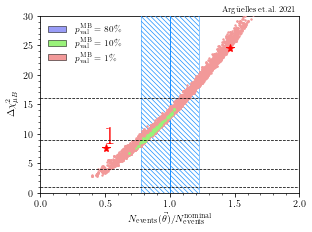

In [127]:
fig, ax = std_fig(ax_form=[0.12,0.16,0.81,0.8])

# plot the vertical region
plot_MB_vertical_region(ax)


# Banana plot
color1=(0.6,0.61,0.97)
# color1='green'
color2=(0.60,0.95,0.48)
# color2='yellow'
color3=(0.95,0.6,0.6)
# color3='blue'

ndf = 4.7
pvals = [0.8, 0.1, 0.01]
masks = [example.mb_pval > pvals[i] for i in range(len(pvals))]

colors=[color1, color2, color3]
legends = [r'$ p_{\rm val}^{\rm \footnotesize MB} =  80\%$',
            r'$ p_{\rm val}^{\rm \footnotesize MB} = 10\%$',
          r'$ p_{\rm val}^{\rm \footnotesize MB} = 1\%$']

def plot_banana(ax, x_vals, chi2_vals, mask, color='black'):
    ax.scatter(x_vals[mask], chi2_vals[mask] - mub_chi2_null_hypothesis,
               s=2, color=color, alpha=1, zorder=3, rasterized=True)
handles =[]
for i in [2,1,0]:
    plot_banana(ax, example.mb_x, example.mub_chi2s, mask=masks[i], color=colors[i])
    handles.append(mpatches.Patch(facecolor=colors[i], edgecolor='black', lw=0.5, label=legends[i]))

# Horizontal lines
dchi2_thresholds=[1,4,9,16]    
for i in range(4):
#     ax.annotate(fr"$\Delta \chi^2_{{\mu B}} = $ {dchi2_thresholds[i]:.3g}", fontsize=8, xy=(0.05,0.5+dchi2_thresholds[i]), xycoords='data', zorder=12)
    ax.hlines(dchi2_thresholds[i], 0,3, colors='black', zorder=10, linewidths=[0.75], linestyles=['--'])
ax.legend(handles=handles[::-1], loc='upper left', fontsize=9)


ax.plot([np.sum(mb_template_worst)/example.nominal_nevents],
            [cern.Chi2_Inclusive(mub_template_worst)-mub_chi2_null_hypothesis], markersize=8, color='red', marker='*',zorder=100)
ax.annotate(r'1',
            color='red',
            xy=(np.sum(mb_template_worst)/example.nominal_nevents,
            cern.Chi2_Inclusive(mub_template_worst)-20), 
            xycoords='data',fontsize=25)

ax.plot([np.sum(mb_template_best)/example.nominal_nevents],
            [cern.Chi2_Inclusive(mub_template_best)-mub_chi2_null_hypothesis], markersize=8, color='red', marker='*',zorder=100)


ax.set_xlim(0,2)
ax.set_ylim(0,30)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.set_xlabel(r"$N_{\rm events}(\vec{\theta})/N_{\rm events}^{\rm nominal}$")
ax.set_ylabel(r"$\Delta \chi^2_{\mu B}$")
ax.annotate(r"Arg\"uelles\,et.\,al.\,2021", fontsize=8, xy=(0.7,1.02), xycoords='axes fraction')
fig.savefig(f"{PATH_PLOTS}/Fig_2.png", dpi=400)
fig.savefig(f"{PATH_PLOTS}/Fig_2.pdf", dpi=400)


### Plot the signal strengths

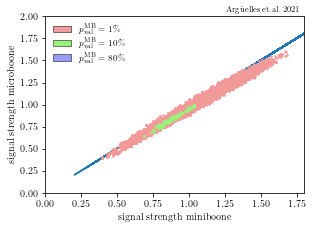

In [136]:
fig, ax = std_fig(ax_form=[0.12,0.16,0.81,0.8])
   
def plot_banana_x(ax, x_vals_mb, mub_templates, mask, color='black'):
    x_mub = np.sum(mub_templates, axis=1)/38.8
    ax.scatter(x_vals_mb[mask], x_mub[mask], s=2.5, color=color, alpha=1, zorder=3, rasterized=True)
    
    
handles =[]
for i in [2,1,0]:
    plot_banana_x(ax, example.mb_x, example.micro_templates, mask=masks[i], color=colors[i])
    handles.append(mpatches.Patch(facecolor=colors[i], edgecolor='black', lw=0.5, label=legends[i]))
ax.legend(handles=handles, loc='upper left', fontsize=9)
# plot_banana(ax, mub_x*360/381.2, mub_chi2s, mask=np.full(len(mub_x),True), color='black')


ax.set_xlim(0,1.8)
ax.set_ylim(0,2)

# ax.xaxis.set_major_locator(MultipleLocator(0.5))
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

# ax.yaxis.set_major_locator(MultipleLocator(5))
# ax.yaxis.set_minor_locator(MultipleLocator(1))


# ax.hlines([16,9,4,1], 0,3, colors=colors, zorder=10)
plt.plot(example.mb_x, example.mb_x)
ax.set_xlabel(r"signal strength miniboone")
ax.set_ylabel(r"signal strength microboone")
ax.annotate(r"Arg\"uelles\,et.\,al.\,2021", fontsize=8, xy=(0.7,1.02), xycoords='axes fraction')
fig.savefig(f"{PATH_PLOTS}/x_vs_x.png", dpi=400)
fig.savefig(f"{PATH_PLOTS}/x_vs_x.pdf", dpi=400)


# Figure 1

In [137]:
# settings for Fig. 1
TOTAL_RATE = False
INCLUDE_MB_LAST_BIN = False
STACKED = False
PLOT_FAMILY=False
colormap=cm.Blues
TEMP1_COLOR = 'deeppink'
TEMP2_COLOR = 'dodgerblue'

NameError: name 'plot_tools' is not defined

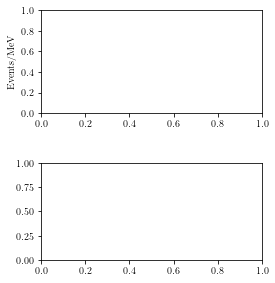

In [139]:
fig, ax1, ax2 = double_axes_fig(height=0.33, gap=0.17, fig_size=(3.2*1.2,3.4*1.2))

######################################
# MiniBooNE 
if TOTAL_RATE:
    units= 1
    ax1.set_ylabel(r"Events")#/MeV")
else:
    units = 1/mbfit.bin_width
    ax1.set_ylabel(r"Events/MeV")


# plot data
plot_tools.data_plot(ax1, 
          X=mbfit.bin_centers/1e3,
          Y=(mbfit.mb_nue_analysis_data)*units, 
          xerr=np.diff(mbfit.bin_edges)/2/1e3, 
          yerr=np.sqrt(mbfit.mb_nue_analysis_data)*units,
          zorder=1)

ax1.hist(mbfit.bin_centers/1e3,
     weights=mbfit.mb_nue_analysis_predicted_background*units,
     bins=mbfit.bin_edges/1e3, 
     lw = 1, 
         alpha=0.5,
    facecolor="#beaed4",#(0.8,0.33,0.33),
     label = "backgrounds")    

plot_tools.step_plot(ax1,
              x=mbfit.bin_edges[:-1]/1e3,
              y=mbfit.mb_nue_analysis_predicted_background*units,
              color='black',  
              lw=1,
              label="")

if PLOT_FAMILY:
    ###
    # Family of templates
    templates_MB = test_templates_norm
    n= len(templates_MB)
    rand_indices = np.random.choice(len(templates_MB), n)

    templates_muB = test_micro_templates_norm
    micro_rand_indices = np.random.choice(len(templates_muB), n)

    # plot a few examples
    for i in rand_indices:
        c = colormap( test_pval_free[i]/np.max(test_pval_free) )
        plot_tools.step_plot(ax1,
                      x=mbfit.bin_edges[:-1]/1e3,
                      y=(templates_MB[i]+0*mbfit.mb_nue_analysis_predicted_background)*units,
                      color=c,  lw=0.1,
                      label="")

    
MB_LEE = mbfit.mb_nominal_excess
plot_tools.step_plot(ax1, 
              x=mbfit.bin_edges[:-1]/1e3,
              y=(MB_LEE+ STACKED*mbfit.mb_nue_analysis_predicted_background)*units,
              color='black',
              label=r'nominal')


plot_tools.step_plot(ax1,
              x=mbfit.bin_edges[:-1]/1e3,
              y=(np.clip(mb_template_worst, 0, np.inf) + STACKED*mbfit.mb_nue_analysis_predicted_background) *units,
              color=TEMP1_COLOR,  
              lw=1.5,
              label="template 1")


plot_tools.step_plot(ax1,
              x=mbfit.bin_edges[:-1]/1e3,
              y=(np.clip(mb_template_best, 0, np.inf) + STACKED*mbfit.mb_nue_analysis_predicted_background) *units,
              color=TEMP2_COLOR,  
              lw=1.5,
              label="template 2")

# # plot sterile
# MiniBooNE event rates
plot_tools.step_plot(ax1, 
              x=mbfit.bin_edges[:-1]/1e3,
              y=(mbfit.mb_sterile_best_fit+STACKED*mbfit.mb_nue_analysis_predicted_background)*units,
              color='black',
                dashes=(1,1),
              label=r'3+1 best-fit')



ax1.legend(fontsize=8, markerfirst=False, ncol=2)
ax1.annotate(text=r'\textbf{MiniBooNE 2018}', xy=(0.0,1.05), xycoords='axes fraction', fontsize=8)
ax1.set_xlabel(r"Reconstructed $E_\nu^{\rm QE}$ (GeV)", fontsize=9, labelpad=2.5)
if INCLUDE_MB_LAST_BIN:
    ax1.set_xticks([0.2,0.5,1,1.5,2,2.5,3])
    ax1.set_xlim(0.2,3)
else:
    ax1.set_xticks([0.2,0.4,0.6,0.8,1,1.2,1.4])
    ax1.set_xlim(0.2,1.5)

ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))


######################################
# MicroBooNE
n= 100
if PLOT_FAMILY:
#     plot a few examples
    for i in micro_rand_indices:
#         c = colormap( test_pval_norm[i]/np.max(test_pval_norm) )
        plot_tools.step_plot(ax2,
                      x=cern.BinEdge[:-1],
                      y=templates_muB[i]+cern.BkgVec*0,
                      color=c,  lw=0.1,
                      label="")
    
micro_nominal_template=get_micro_templates(np.array([ mbfit.mb_nue_analysis_data -  mbfit.mb_nue_analysis_predicted_background]))
plot_tools.step_plot(ax2,
              x=cern.BinEdge[:-1],
              y=micro_nominal_template+cern.BkgVec*STACKED,
              color='black',  lw=1.5,
              label=r"nominal")

plot_tools.step_plot(ax2,
              x=cern.BinEdge[:-1],
              y=np.clip(mub_template_worst, 0, np.inf)+cern.BkgVec*STACKED,
              color=TEMP1_COLOR,  lw=1.5,
              label=r"template 1")

plot_tools.step_plot(ax2,
              x=cern.BinEdge[:-1],
              y=np.clip(mub_template_best, 0, np.inf)+cern.BkgVec*STACKED,
              color=TEMP2_COLOR,  lw=1.5,
              label=r"template 2")


plot_tools.step_plot(ax2, 
              x=cern.BinEdge[:-1],
              y=(np.append(0,converter.miniToMicro(mbfit.mb_sterile_best_fit))+cern.BkgVec*STACKED),
              color='black',
              dashes=(1,1),
              label=r'3+1 best-fit')


# background
ax2.hist(cern.BinCenter,
     weights=cern.BkgVec,
     bins=cern.BinEdge, 
     lw = 1, 
    facecolor=(0.5,0.88,0.55),
     label = r"backgrounds")    
# data plot
plot_tools.data_plot(ax2, 
          X=cern.BinCenter,
          Y=cern.DatVec, 
          xerr=np.diff(cern.BinEdge)/2, 
          yerr=np.sqrt(cern.DatVec),
         zorder=2)
plot_tools.step_plot(ax2,
              x=cern.BinEdge[:-1],
              y=cern.BkgVec,
              color='black',  
              lw=0.5,
              label="")

ax2.xaxis.set_major_locator(MultipleLocator(0.5))
ax2.xaxis.set_minor_locator(MultipleLocator(0.1))

ax2.annotate(text=r'\textbf{MicroBooNE 2021} (Inclusive FC unconstrained)', xy=(0.0,1.05), xycoords='axes fraction', fontsize=8)
ax2.legend(fontsize=7, markerfirst=False, ncol=3)
ax2.set_xlabel(r"Reconstructed $E_\nu$ (GeV)", fontsize=9, labelpad=2.5)
ax2.set_ylabel(r"Events/100 MeV")
ax2.set_xlim(np.min(cern.BinEdge),np.max(cern.BinEdge))
# ax.hlines(0,0,2e3, lw=0.75, ls='--', color='black')
ax2.set_ylim(0,45)

ax1.annotate(text=r'Arg\"uelles\,et.\,al.\,2021', xy=(0.65,1.05), xycoords='axes fraction', fontsize=8.5)

fig.savefig(f"{PATH_PLOTS}/Fig_1.png", dpi=400)
fig.savefig(f"{PATH_PLOTS}/Fig_1.pdf")

# Paper plots

In [174]:
delta_chi2s = chi2s - np.min(chi2s, axis=0)
i_chi2_min = np.argmin(np.sum(delta_chi2s, axis=1))
i_chi2_max = np.argmax(np.sum(delta_chi2s, axis=1))

In [75]:
# get the minimal template
min_delta_chi2s = np.empty(0)
for i in range(len(x)):
    min_delta_chi2s = np.append(min_delta_chi2s, np.min(delta_chi2s[:,i]))

In [93]:
best_template = test_templates_free[i_chi2_min]
print(best_template)
mub_best_template = np.append(0,converter.miniToMicro(best_template))

[169.49378    155.84720171 226.41970476  77.69474387  68.70430268
  66.02649682  66.08117128  39.7793506   51.0968461   68.55970876
  96.98580602]


### compute all MicroBooNE chi2s

In [80]:
# settings for Fig. 2
INCLUDE_BAND = True
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom greys', [(0.9,0.9,0.9),(0.5,0.88,0.55)], N=1)
colormap=cmap#cm.Blues

(1, 25)


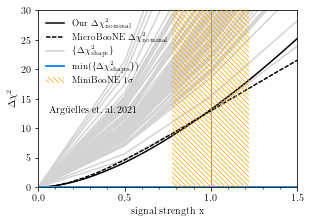

In [81]:
official_muB_template = np.load("PyModules/InclusiveData/LEE_x1_Expectation.npy")
micro_nominal_template = get_micro_templates(np.array([mbfit.mb_nominal_excess]))


fig, ax = plot_tools.std_fig(ax_form=[0.12,0.16,0.81,0.8])

# plot a few examples
# x, chi2s = get_microboone_chi2s_in_x(filtered_micro_templates_free, Npoints_for_x=100)
n=len(chi2s)
for i in range(n):
    c = colormap( 1 - (np.sum(chi2s, axis=1)[i] - np.min(np.sum(chi2s, axis=1)))/(np.max(np.sum(chi2s, axis=1)) - np.min(np.sum(chi2s, axis=1))) )
    ax.plot(x, chi2s[i] - np.min(chi2s[i]), color='lightgrey', alpha=1)
    
x_nominal, chi2_nominal = get_microboone_chi2s_in_x(micro_nominal_template, Npoints_for_x=100)
ax.plot(x_nominal, chi2_nominal[0] - np.min(chi2_nominal[0]), color='black', lw=1.5, label=r'Our $\Delta \chi^2_{\rm nominal}$')

df=pd.read_csv("kk/InclusiveChannel/muB_1eX_eLEE_Chi2_Official.csv", sep=',', header=None)
x_official, chi2official = df.values.T[0], df.values.T[1] 
ax.plot(x_official,chi2official, c='black', dashes=(3,1), label=r'\noindent MicroBooNE $\Delta \chi^2_{\rm nominal}$\\\ \,')


ax.plot(x, chi2s[i] - np.min(chi2s[i]), color='lightgrey', alpha=1, label=r'$\{\Delta\chi^2_{\rm shape}\}$', zorder=-1)
ax.plot(x, min_delta_chi2s, c='dodgerblue', lw=2, label=r'min($\{ \Delta\chi^2_{\rm shapes}\})$')
# ax.plot(x,delta_chi2s[i_chi2_min], c='dodgerblue', label=r'min($\{ \Delta\chi^2_{\rm shape}\}$')

##########
# MINIBOONE 2018

matplotlib.rcParams['hatch.linewidth'] = 0.7
y = [0,1e10]
NEVENTS=381.2
ERROR = 85.2
xleft = (NEVENTS-ERROR)/NEVENTS
xright = (NEVENTS+ERROR)/NEVENTS
ax.fill_betweenx(y,[xleft,xleft],[xright,xright], zorder=3,
                     ec='orange', fc='None',
                     hatch='\\\\\\\\\\',
                     lw=0,
                    label=r'MiniBooNE $1 \sigma$')
xleft = (NEVENTS-np.sqrt(NEVENTS))/NEVENTS
xright = (NEVENTS+np.sqrt(NEVENTS))/NEVENTS
# ax.fill_betweenx(y,[xleft,xleft],[xright,xright], zorder=5,
#                      ec='darkorange', fc='None',
#                      hatch='xxxxxx',
#                      lw=0)
ax.vlines(1,0,1e10, zorder=3, lw=1, color='darkorange')


ax.set_xlim(0,1.5)
ax.set_ylim(0,30)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.legend(loc='upper left', fontsize=9)

ax.set_xlabel(r"signal strength x")
ax.set_ylabel(r"$\Delta \chi^2$")
# ax.annotate(r"Arg\"uelles et. \!al. 2021", xy=(0.63,0.02), xycoords='axes fraction')
ax.annotate(r"Arg\"uelles et.\,al.\,2021", xy=(0.04,0.42), xycoords='axes fraction')
fig.savefig(f"{PATH_PLOTS}/Fig_2.png", dpi=400)
fig.savefig(f"{PATH_PLOTS}/Fig_2.pdf")

In [83]:
# Banana plot

ValueError: x and y must be the same size

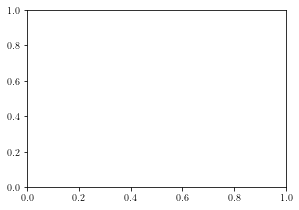

In [84]:
fig, ax = plot_tools.std_fig(ax_form=[0.12,0.16,0.81,0.8])



ax.scatter(x, chi2s)


ax.set_xlim(0,1.5)
ax.set_ylim(0,30)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.legend(loc='upper left', fontsize=9)

ax.set_xlabel(r"signal strength x")
ax.set_ylabel(r"$\Delta \chi^2$")
# ax.annotate(r"Arg\"uelles et. \!al. 2021", xy=(0.63,0.02), xycoords='axes fraction')
ax.annotate(r"Arg\"uelles et.\,al.\,2021", xy=(0.04,0.42), xycoords='axes fraction')
fig.savefig(f"{PATH_PLOTS}/Fig_2_bananas.png", dpi=400)
fig.savefig(f"{PATH_PLOTS}/Fig_2_bananas.pdf")

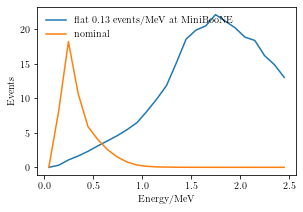

In [82]:
fig, ax = plot_tools.std_fig()

flat_temp = np.ones(11)*0.2*mbfit.bin_width/1.5
mub_flat_temp = np.append(0.0, converter.miniToMicro(flat_temp))

ax.plot(cern.BinCenter, mub_flat_temp, label='flat 0.13 events/MeV at MiniBooNE')
z=np.ones(11)
z[0] = 2
ax.plot(cern.BinCenter, np.append(0, converter.miniToMicro(mbfit.mb_nominal_excess*z)), label='nominal')
ax.set_xlabel('Energy/MeV')
ax.set_ylabel('Events')
ax.legend(loc='upper left')
